In [1]:
import nltk
import json
import re
from nltk.stem.porter import *
import seaborn as sns
import pandas as pd
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import WordPunctTokenizer
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import random
import os

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
dataset_path = '/content/raw'

# Reading Dataset from .json file

In [3]:
def read_dataset(path, name):
    rows = []
    
    with open(f'{path}/{name}', 'r', encoding='utf-8') as f:
        rows = json.load(f)
    return rows

# Saving dataset into .json file

In [4]:
def save_dataset(path, name, data):
    with open(f'{path}/{name}', 'w', encoding='utf-8') as f:
        json.dump(data, f, ensure_ascii=False, indent=4)
    return

## Break Dataset into sentences

In [5]:
def sent_broken(dataset):
    captions = [d['caption'] for d in dataset]
    sentences = [sent_tokenize(caption) for caption in captions]

    new_data = [None] * len(dataset)
    idx = 0
    for d, s in zip(dataset, sentences):
        new_data[idx] = {'id': d['id'],  'title':d['title'], 'image_url': d['image_url'] , 'caption': s}
        idx += 1

    return new_data

## Break Dataset into words

In [6]:
def word_broken(dataset):
    captions = [d['caption'] for d in dataset]
    words = [word_tokenize(caption) for caption in captions]

    new_data = [None] * len(dataset)
    idx = 0
    for d, w in zip(dataset, words):
        new_data[idx] = {'id': d['id'],  'title':d['title'], 'image_url': d['image_url'] , 'caption': w}
        idx += 1
    
    return new_data

## Cleaning Dataset

In [7]:
def clean_dataset(dataset):   
    porter = PorterStemmer()
    
    tokenizer = WordPunctTokenizer()
    cleaned_data = [ ]
    for d in dataset:
        caption = d['caption']

        # remove punctutaions except '.'
        caption = re.sub(r'[^\w\s\.]', '', caption)

        # remove numbers
        caption = re.sub(r'[\d]', '', caption)

        # split by word
        caption = tokenizer.tokenize(caption)   

        # convert to lower case
        caption = [word.lower() for word in caption]        

        cleaned_data.append(' '.join(caption))

    new_data = [None] * len(dataset)
    idx = 0
    for d, c in zip(dataset, cleaned_data):
        new_data[idx] = {'id': d['id'],  'title':d['title'], 'image_url': d['image_url'] , 'caption': c}
        idx += 1

    return new_data

# Statistics

In [8]:
def count_samples_in_dataset(dataset):
  return len(dataset)

In [9]:
def sentence_count(dataset):
  sent_count = 0
  for d in dataset:
    sent_count += len(d['caption'])
  return sent_count

In [10]:
def word_count(dataset):
  word_count = 0
  words = []
  for d in dataset:
    word_count += len(d['caption'])
    words += [w for w in d['caption']]
  return word_count, words

In [11]:
def unique_word_count(dataset):
  all_words = [words for d in dataset for words in d['caption']]
  unique_words = list(set(all_words))
  return len(unique_words) , unique_words

In [12]:
def words_per_caption(dataset):
  captions = [len(d['caption']) for d in dataset]
  return captions

In [13]:
def word_cloud(text):
    # make wordcloud
    words = " ".join(text) + " "

    wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(words)

    # plot the WordCloud image                      
    plt.figure(figsize = (5, 5), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()

# Statistics before cleaning

In [14]:
file_name = "dataset.json"
dataset_before_cleaning = read_dataset(dataset_path, file_name)
sentences = sent_broken(dataset_before_cleaning)
words_dataset = word_broken(dataset_before_cleaning)

print('before cleaning....')
print('count : ', count_samples_in_dataset(dataset_before_cleaning))
print('sent count: ', sentence_count(sentences))
words_count, words = word_count(words_dataset)
print('word count: ', words_count)
print('unique word count: ', unique_word_count(words_dataset))

before cleaning....
count :  12602
sent count:  16664
word count:  249682
unique word count:  (12135, ['outing', 'open-plan', 'bulb', 'cube', 'inch', 'framing', 'smartphone', 'lace', 'swirl', 'gift', 'Pastel', 'charred', 'eyed', 'young', 'halves', 'juicy', 'reptile', 'cemetery', 'baby/toddler', 'Plates', 'wildflower', 'yamaka', 'handfuls', 'pride', 'help', 'models', 'finest', 'messenger', 'trays', 'glacier', 'waffles', 'crunch', 'arrived', 'plug', 'grapevines', 'office', 'beak', 'words', 'Family', 'vitamin', 'stormy', 'utmost', 'dough', 'adjusting', 'Stoney', 'semi-frozen', 'tumbler', 'sneaker', 'logo', 'accompanies', 'contrast', 'trails', 'quarter', 'archaeologists', 'sparsely', 'vivid', 'celebrates', 'corridors', 'Awwwww', 'aloft', 'scribbled', 'case', 'clouded', 'dried', 'sheltering', 'analysis', 'adjustable', 'variety', 'sidewalk', 'Chalk', 'towel', 'Got', 'staying', 'posh', 'Eight', 'zen', 'refer', 'Twitter', 'studio', 'photographer', 'backward', 'latch', 'Park', 'Most', "'travel"

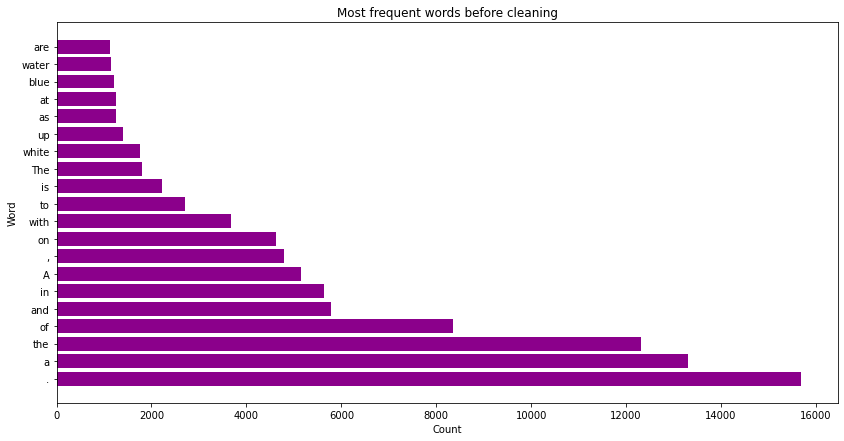

In [15]:
word_dict_without_cleaning = Counter(words)
most_frequent = dict(word_dict_without_cleaning.most_common(20))
fig = plt.figure(figsize=(14, 7))
plt.barh(list(most_frequent.keys()), list(most_frequent.values()), color='darkmagenta')
plt.title('Most frequent words before cleaning')
plt.ylabel('Word')
plt.xlabel('Count')
plt.show()

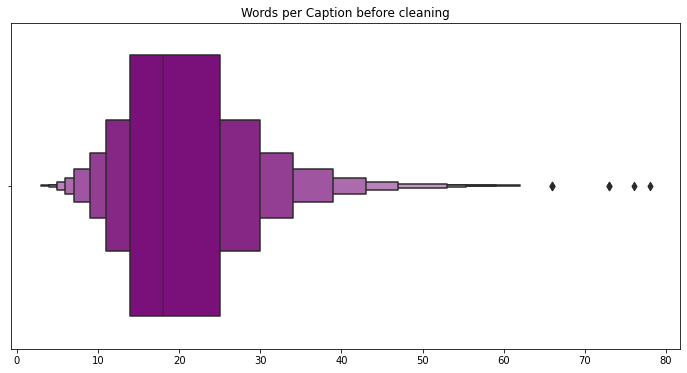

In [16]:
word_cap = words_per_caption(words_dataset)
fig = plt.figure(figsize=(12, 6))
plt.title('Words per Caption before cleaning')
sns.boxenplot(x=pd.Series(word_cap), color='darkmagenta')

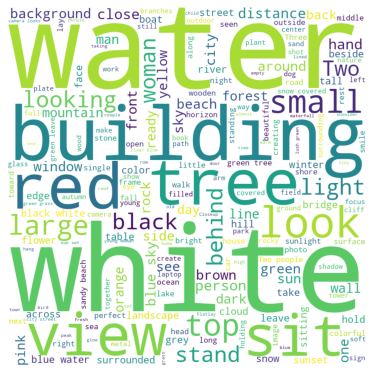

In [17]:
word_cloud(words)

# Statistics after cleaning

In [18]:
processed_path = '/content/processed'
os.makedirs(processed_path, exist_ok=True)

In [24]:
dataset_after_cleaning = clean_dataset(dataset_before_cleaning)
file_name2 = "cleaned_dataset.json"
save_dataset(processed_path, file_name2, dataset_after_cleaning)

sentences = sent_broken(dataset_after_cleaning)
file_name3 = "sentences.json"
save_dataset(processed_path, file_name3, sentences)

words_dataset = word_broken(dataset_after_cleaning)
file_name4 = "words.json"
save_dataset(processed_path, file_name4, words_dataset)

print('after cleaning....')
print('count : ', count_samples_in_dataset(dataset_after_cleaning))
print('sent count: ', sentence_count(sentences))
words_count, words = word_count(words_dataset)
print('word count: ', words_count)
print('unique word count: ', unique_word_count(words_dataset))

after cleaning....
count :  12602
sent count:  16404
word count:  242598
unique word count:  (10333, ['outing', 'bulb', 'cube', 'inch', 'framing', 'smartphone', 'lace', 'swirl', 'gift', 'charred', 'eyed', 'young', 'halves', 'cn', 'juicy', 'reptile', 'cemetery', 'wildflower', 'yamaka', 'handfuls', 'pride', 'help', 'models', 'finest', 'messenger', 'trays', 'glacier', 'waffles', 'crunch', 'arrived', 'plug', 'grapevines', 'openkitchen', 'office', 'beak', 'words', 'vitamin', 'stormy', 'utmost', 'dough', 'adjusting', 'tumbler', 'sneaker', 'logo', 'crisscross', 'accompanies', 'contrast', 'trails', 'quarter', 'archaeologists', 'vivid', 'sparsely', 'celebrates', 'corridors', 'puffins', 'aloft', 'scribbled', 'case', 'clouded', 'dried', 'sheltering', 'analysis', 'adjustable', 'variety', 'sidewalk', 'towel', 'staying', 'posh', 'zen', 'refer', 'studio', 'photographer', 'backward', 'latch', 'caramel', 'meets', 'chalked', 'diverge', 'lartisan', 'bless', 'distressed', 'handling', 'flooded', 'fencing',

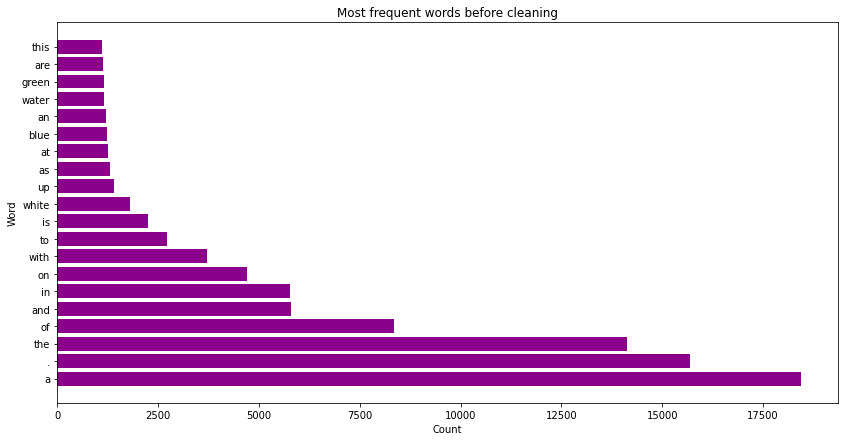

In [20]:
word_dict_with_cleaning = Counter(words)
most_frequent = dict(word_dict_with_cleaning.most_common(20))
fig = plt.figure(figsize=(14, 7))
plt.barh(list(most_frequent.keys()), list(most_frequent.values()), color='darkmagenta')
plt.title('Most frequent words before cleaning')
plt.ylabel('Word')
plt.xlabel('Count')
plt.show()

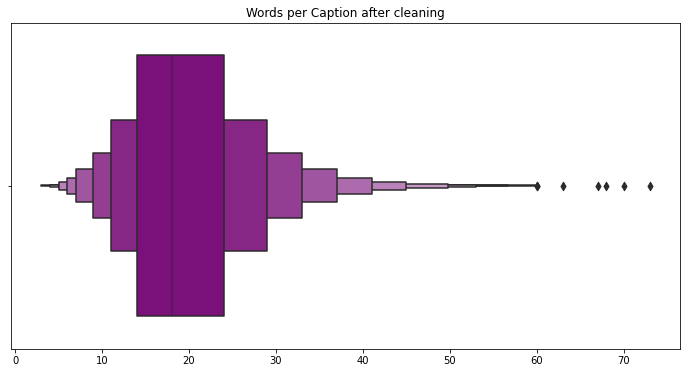

In [21]:
word_cap = words_per_caption(words_dataset)
fig = plt.figure(figsize=(12, 6))
plt.title('Words per Caption after cleaning')
sns.boxenplot(x=pd.Series(word_cap), color='darkmagenta')

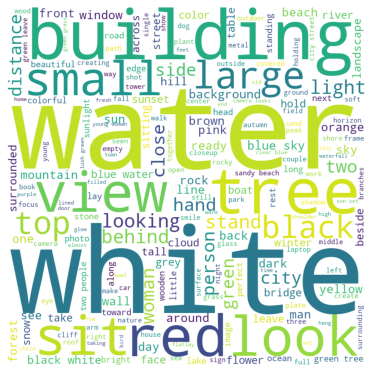

In [22]:
word_cloud(words)

# Data after cleaning Vs. Data before cleaning

In [23]:
original_dataset = read_dataset(dataset_path, "MAIN_DATASET.json")
cleaned_dataset = read_dataset(processed_path, 'cleaned_dataset.json')

print("**** Original Samples and Cleaned Samples ****")
print("")
examples_count = 15
dataset_count = len(original_dataset)

for i in range(examples_count):
  idx = random.randint(0, dataset_count)

  orig = original_dataset[idx]['caption']
  clean = cleaned_dataset[idx]['caption']

  print("original: ")
  print(orig)

  print("cleaned: ")
  print(clean)
  print()

**** Original Samples and Cleaned Samples ****

original: 
The moss of the forest has provided a blanket for this sleeping stone giant. It has crept over the body, leaving only the face and hand exposed, both of which look peaceful and calm.
cleaned: 
the moss of the forest has provided a blanket for this sleeping stone giant . it has crept over the body leaving only the face and hand exposed both of which look peaceful and calm .

original: 
Against a bright white surface lays green peas in their pod and three strawberries. There are loose peas scattered around as well.
cleaned: 
against a bright white surface lays green peas in their pod and three strawberries . there are loose peas scattered around as well .

original: 
The white metal railings of this pink-washed multi-story apartment block are wondrously geometric!
cleaned: 
the white metal railings of this pinkwashed multistory apartment block are wondrously geometric

original: 
A dirt road points us in the direction of the moun